<a href="https://colab.research.google.com/github/DerMilchShake/cluster/blob/main/cluster_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means-Clustering**

# **1. Bibliothek importieren**

Importieren der benötigten Programmbibliotheken:



*   Matlplotlib (Visualisierung der Plots)
*   Seaborn (Erweiterung von matplotlib)
* NumPy (Umgang mit Vektoren, Matrizen, Arrays)
* Pandas (Datenverwaltung)
* scipy.cluster.hierarchy (hierarchisches Verfahren)
* KMeans (partitionierendes Verfahren)
* AgglomerativeClustering (hierarchisches Verfahren)



In [1]:
 import matplotlib.pyplot as plt   
 import seaborn as sns; sns.set()  
 import numpy as np  
 import pandas as pd 
 import scipy.cluster.hierarchy as shc  
 from sklearn.cluster import KMeans 
 from sklearn.cluster import AgglomerativeClustering 
 %matplotlib inline

# **2. Daten einlesen und anzeigen**

Daten aus der .csv Datei werden mit der Pandas Bibliothek eingelesen und angezeigt.

In [2]:
 # Lese CSV-Datei mit Werten zur Clusteranalyse aus Github ein
 # in dem Fall: Raumklima-Datensatz mit Temperatur/Feuchtigkeit
 url = 'https://raw.githubusercontent.com/DerMilchShake/cluster/main/raumklima.csv'
 klima_data = pd.read_csv(url,sep=';', header=0)  
 
 # Merkmale/Variablen Feuchtigk. und Temp. separat speichern
 X = klima_data.iloc[:,[0,1]].copy() 
 
 # Wahre Zuordnung zu den Kategorien speichern
 cluster_true=klima_data.iloc[:,2].copy() 
 
 # Zeige ausgewählte Zeilen zur Kontrolle an 
 klima_data.head(10)

,Feuchte,Temp,Cluster
0,42,21,behaglich
1,45,19,behaglich
2,52,19,behaglich
3,55,21,behaglich
4,53,22,behaglich
5,69,23,zu feucht
6,80,21,zu feucht
7,81,23,zu feucht
8,73,25,zu feucht
9,75,25,zu feucht


# **3. Daten visualisieren**

Daten werden in Array konvertiert und mit der Matplotlib-Bibliothek als Streudiagramm dargestellt.

<class 'numpy.ndarray'>


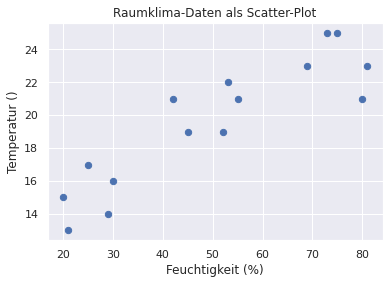

In [3]:
 X = np.array(X) # Typkonvertierung: DataFrame->Array  
 print(type(X))  
 # Daten visualisieren  
 plt.scatter(X[:,0], X[:,1],s=40);  
 plt.title('Raumklima-Daten als Scatter-Plot')  
 plt.xlabel('Feuchtigkeit (%)');plt.ylabel('Temperatur ()'); 

# **4. Clusteranalyse durchführen**

Clusteranalyse wird mittels der scikit-learn Bibliothek durchgeführt.
Mit kmeans wird die Anzahl der Cluster festgelegt. 
Ausgegeben wird der Index dex Clusters (0, 1, 2).

In [6]:
 #Anzahl der Zentren festlegen
 kmeans = KMeans(n_clusters=3) 
 
 # Vorhersage mittels K-Means-Verfahren
 kmeans.fit(X)
 y_kmeans = kmeans.predict(X)
 
 # vorhergesagte Zuordnungen der Merkmalskombinationen zu den geschätzten Zentren
 y_kmeans

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=int32)

# **5. Zuordnung der Daten zu den Clustern visualisieren**

Zuordnungen der Beobachtunfen zu den vorher festgelegten 3 Clustern wird als Plot dargestellt.

Merkmalswerte der Zentren:
[[49.4 20.4]
 [25.  15. ]
 [75.6 23.4]]


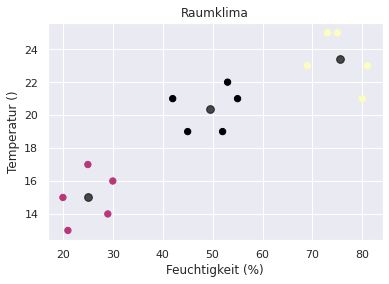

In [7]:
 # Daten visualisieren: Merkmale
 plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=40, cmap='magma')
 
 # Daten visualisieren: Zentren
 centers = kmeans.cluster_centers_
 plt.scatter(centers[:, 0], centers[:, 1], c='black', s=60, alpha=0.7);
 
 plt.title("Raumklima")
 plt.xlabel('Feuchtigkeit (%)');plt.ylabel('Temperatur ()'); 
 
 # Merkmalswerte der Zentren ausgeben
 print('Merkmalswerte der Zentren:')  
 print(centers)  